### To see, or not to see,  
## (code):

In [ ]:
# create toggle for hiding or displaying raw code
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to view/hide the raw code."></form>''')

# Portfolio Analysis

author: Jan Erish Baluca

The following Portfolio Analysis was originally taught in R and translated by me to Python.

Dataset Source: Datacamp


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bokeh.io import output_file
from bokeh.plotting import figure, show
import seaborn as sns

## Asset Weighting (sample)

An asset's weight can be determined using either the amount invested on it or its market capitalization, divided by the portfolio's respective totals.

In [2]:
# Calculating weight
# Dictionary version
values = [500000, 200000, 100000, 20000]
names = ['Inv 1', 'Inv 2', 'Inv 3', 'Inv 4']
assets = dict(zip(names, values))


# pandas DataFrame version
portfolio = pd.DataFrame()
portfolio['Assets'] = names
portfolio['Value_Invested'] = values
portfolio['Weights'] = portfolio['Value_Invested'] / portfolio.Value_Invested.sum()
portfolio.set_index('Assets', inplace=True)

# Dictionary to Dataframe
# for loop
weights = {}
for k, v in assets.items(): 
        weights[k] = [v, v/sum(assets.values())]        
# to DataFrame
portfolio_v2 = pd.DataFrame.from_dict(weights).transpose().rename(columns={0:'Value_Invested',1:'Weights'})


#print(weights)
#print(portfolio_v2)
portfolio

,Value_Invested,Weights
Assets,,
Inv 1,500000,0.609756
Inv 2,200000,0.243902
Inv 3,100000,0.121951
Inv 4,20000,0.024390


## Portfolio Returns
### Relative Value
The return of an asset is its simple return (its final value less its initial value) divided by its initial value. The relative return of a portfolio is the summation of every asset return multiplied that has been multiplied by its respective asset weight.

In [3]:
# Portfolio
portfolio = pd.DataFrame()
portfolio['assets'] = ['Asset_1','Asset_2','Asset_3']
portfolio['initial_value'] = [1000, 5000, 2000]
portfolio['final_value'] = [1100,4500,3000]
portfolio.set_index('assets', inplace=True)

# Calculating asset weights
portfolio['weights'] = portfolio['initial_value'] / sum(portfolio['initial_value'])

# Calculating asset returns
portfolio['returns'] = (portfolio['final_value'] - portfolio['initial_value']) / portfolio['initial_value']

# Portfolio weighted returns
portfolio_returns = sum(portfolio['weights'] *portfolio['returns'])
print("Portfolio Returns: {}%".format(round(portfolio_returns,2)*100))

Portfolio Returns: 8.0%


import pyfolio as pf
import os
os.environ['R_HOME'] = 'C:\\Users\JanErish\Anaconda3\R'
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
pandas2ri.activate()
readRDS = robjects.r['readRDS']

# Time Series: Returns

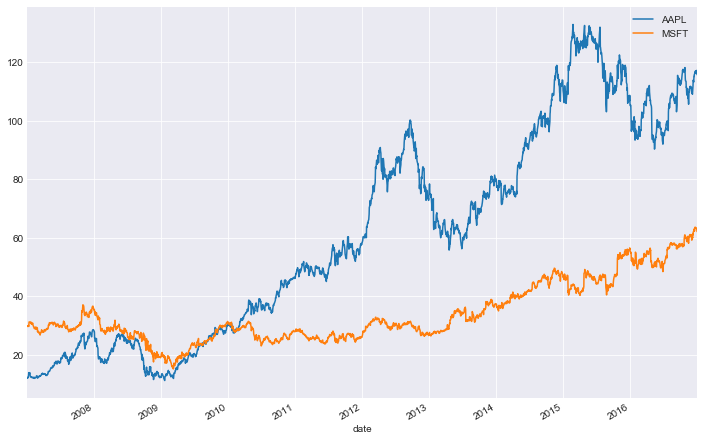

In [4]:
# importing data
#prices = readRDS('aapl_msft.RData')
#prices = pandas2ri.ri2py(prices)
#prices = pd.DataFrame(prices)

# importing data
prices = pd.read_csv('msft_aapl.csv', parse_dates=['date'],index_col='date')

# plotting daily stock prices
sns.set_style("darkgrid")
prices.plot(figsize=(12,8))
plt.show()

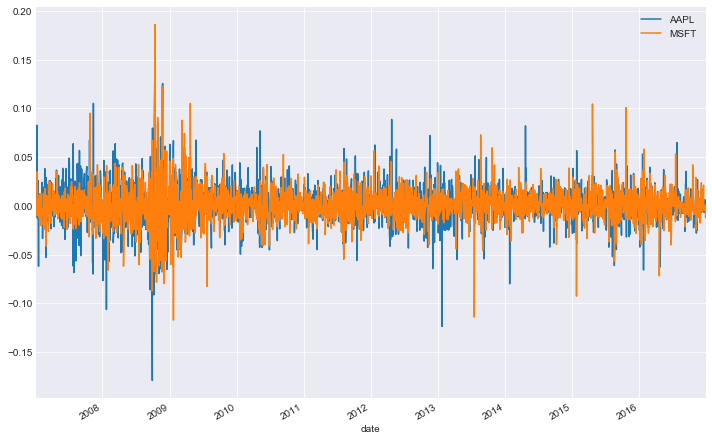

In [5]:
# Calculate daily returns
returns = pd.DataFrame()
returns['AAPL'] = prices.AAPL.pct_change()
returns['MSFT'] = prices.MSFT.pct_change()

# Remove the first row of returns
returns = returns.drop(returns.index[[0]])

# Plotting daily returns
returns.plot(figsize=(12,8))
plt.show()

# Monthly Rebalancing

In [6]:
# Rebalancer
"""Calculates the buys and sells required to bring the actual allocation of
investments as close as possible to the target allocations.
Args:
  investments: a list of dicts representing each investment.
Returns:
  List of buys and sells required to rebalance given investments.
"""
def get_buys_and_sells(investments):
  return _format_buys_and_sells(zip(investments, _calculate_diffs(investments)))


def _calculate_diffs(investments):
  total = (investments[0]['share_price']*investments[0]['shares_owned']/
    investments[0]['actual_allocation'])

  return [int(round(i['target_allocation']*total)/i['share_price']) -
    i['shares_owned'] for i in investments]


def _format_buys_and_sells(diff):
  instructions = []
  for i in diff:
    if i[1] > 0:
      instructions.append("buy " + str(i[1]) + " shares of " + i[0]['ticker'])
    elif i[1] < 0:
      instructions.append("sell " + str(-1*i[1]) + " shares of " + i[0]['ticker'])

  return instructions


# since there are tickers, will have to create multi-level index

# Initialize

# if AAPL, then 0.5

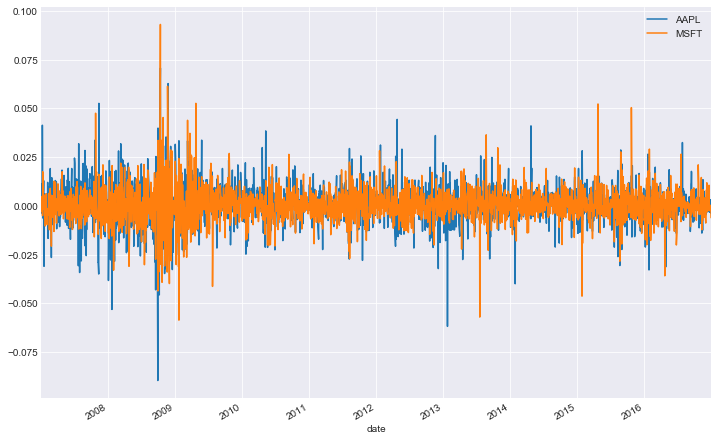

In [7]:
# Buy and Hold: Calculating Weights
weights = np.asarray([0.5,0.5])

# WRONGGGGGG
bah = pd.DataFrame()
bah['AAPL'] = returns.AAPL * 0.5
bah['MSFT'] = returns.MSFT * 0.5
bah.plot(figsize=(12,8))
plt.show()

# Portfolio Performance

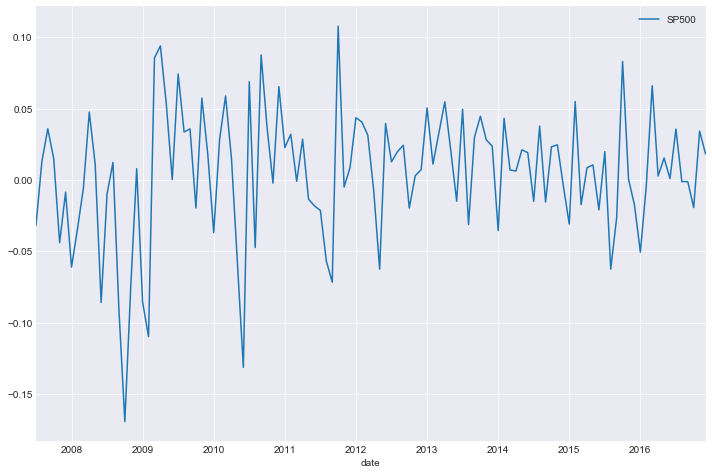

Descriptive Statistics:
Mean of Monthly Returns: 0.004341343996251093
Geometric Mean of Monthly Returns: [ 1.00325536]
Volatility of Monthly Returns: 0.04605734743611491
               SP500
date                
2007-07-31 -0.031982
2007-08-31  0.012864
2007-09-28  0.035794
2007-10-31  0.014822
2007-11-30 -0.044043


In [8]:
# Importing SP500 data
sp500 = pd.read_csv('sp500.csv', parse_dates=['date'], index_col='date')

# Convert the daily frequency of sp500 to monthly frequency (closing prices): sp500_monthly
#sp500_monthly = sp500.resample('BM').asfreq()
sp500_monthly = sp500.asfreq('BM')
#print(sp500_monthly.head(6))


# Create sp500_returns using Return.calculate using the closing prices
sp500_monthly_returns =  sp500_monthly.pct_change()
#sp500_monthly_returns = sp500_monthly_returns.drop(sp500_monthly_returns.head(1).index).ffill()
sp500_monthly_returns = sp500_monthly_returns.drop(sp500_monthly_returns.head(1).index).interpolate(method='linear', axis=0, limit=None)


# Time series plot
sp500_monthly_returns.plot(figsize=(12,8))
plt.show()

# Produce the year x month table ??????????

# import or define a function for computing the geometric mean
from scipy.stats.mstats import gmean
def geo_mean(iterable):
    a = np.array(iterable)
    return a.prod()**(1.0/len(a))

# Descriptive Statistics
print("Descriptive Statistics:")
print("Mean of Monthly Returns: {}".format(np.mean(np.array(sp500_monthly_returns))))
print("Geometric Mean of Monthly Returns: {}".format(gmean(np.array(sp500_monthly_returns+1))))
print("Volatility of Monthly Returns: {}".format(np.std(np.array(sp500_monthly_returns))))
print(sp500_monthly_returns.head())

In [17]:
4.80*5

24.0

## Monthly Mean and Volatility

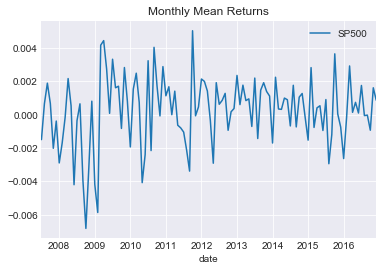

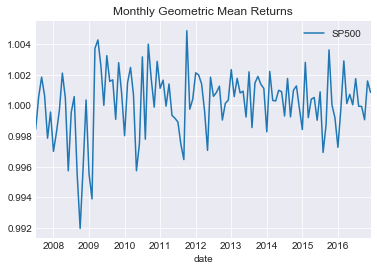

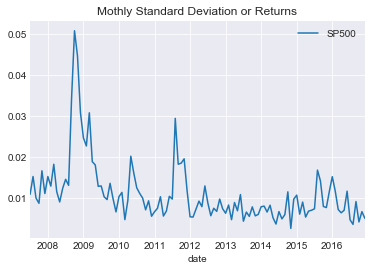

In [9]:
sp500_returns = sp500.pct_change()
sp500_returns = sp500_returns.drop(sp500_returns.head(1).index).ffill()

# Compute the mean monthly returns
sp500_monthly_mean = sp500_returns.resample('BM').mean()
sp500_monthly_mean.plot(title='Monthly Mean Returns')
#print(sp500_monthly_mean.head(5))

# Compute the geometric mean of monthly returns
# calculate the decimal multiplier equivalents of returns to deal with negative values
sp500_ret_dec = sp500_returns + 1
#print(sp500_ret_dec.head(5))

sp500_monthly_geomean = sp500_ret_dec.resample('BM').apply(geo_mean)
#print(sp500_monthly_geomean.index)
sp500_monthly_geomean.plot(title='Monthly Geometric Mean Returns')
#print(sp500_monthly_geomean.head(5))

# Compute the standard deviation
sp500_monthly_stdv = sp500_returns.resample('BM').agg('std')
sp500_monthly_stdv.plot(title='Mothly Standard Deviation or Returns')
plt.show()

## Excess returns and the portfolio's Sharpe ratio

In [10]:
# importing data
rf = pd.read_excel('t_bill_rates.xlsx', parse_dates=['date'], index_col='date')
#print(sp500_monthly_returns.tail(10))

# slicing only required dates
rf = rf[(rf.index >= sp500_monthly_returns.index[0]) & (rf.index <= sp500_monthly_returns.index[-1])]
added = pd.DataFrame([0.0002, 0.0002, 0.0002, 0.0002], columns=['rf'])
added['date'] = sp500_monthly_returns.index[-4:]
added = added.set_index('date')
rf = pd.concat([rf, added], axis=0)

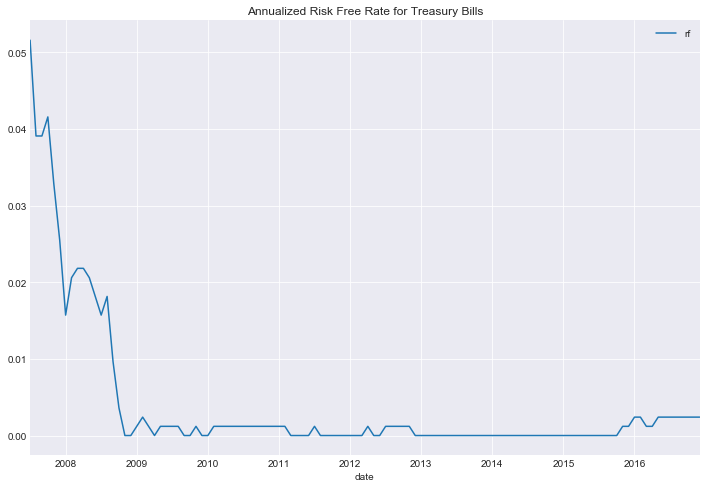

Mean Monthly Returns: 0.00434
Mean Excess Returns: 0.00401
Sharpe Ratio: 0.08687


In [11]:
# Compute the annualized risk free rate
annualized_rf = (1 + rf)**12 - 1

# Plot the annualized risk free rate
annualized_rf.plot(figsize=(12,8), title='Annualized Risk Free Rate for Treasury Bills')
plt.show()

# Compute the series of excess portfolio returns 
sp500_excess = sp500_monthly_returns.values - rf.values

# Compare the mean
print("Mean Monthly Returns: {}".format(round(np.mean(sp500_monthly_returns.values),5)))
print("Mean Excess Returns: {}".format(round(sp500_excess.mean(),5)))

# Compute the Sharpe ratio
sp500_sharpe = sp500_excess.mean() / sp500_excess.std()
print("Sharpe Ratio: {}".format(round(sp500_sharpe,5)))

## Annualized Mean and Volatility

Annualized Mean Returns: 0.0521
Annualized Volatility of Returns: 0.03871
Annualized Sharpe Ratio: 0.30093


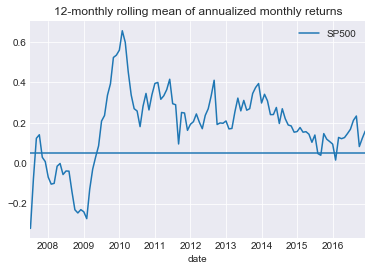

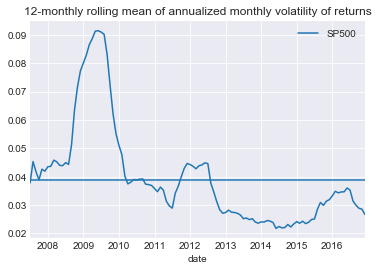

In [12]:
# 12-month window
window= 12

# Compute the annualized mean
ann_mean = (np.mean(sp500_monthly_returns.values))*12
print("Annualized Mean Returns: {}".format(round(ann_mean,5)))
ann_returns = (1+sp500_monthly_returns)**12 - 1

# Compute the annualized standard deviation
ann_std = np.mean((sp500_monthly_stdv.values)*np.sqrt(12))
print("Annualized Volatility of Returns: {}".format(round(ann_std,5)))
ann_vol= sp500_monthly_stdv*np.sqrt(12)

# Compute the annualized Sharpe ratio: ann_sharpe
ann_sharpe = sp500_sharpe * np.sqrt(12)
print("Annualized Sharpe Ratio: {}".format(round(ann_sharpe,5)))


# Plotting the 12-month rolling annualized mean
rolling_mean = ann_returns.rolling(window,min_periods=1).mean()
rolling_mean.plot(title='12-monthly rolling mean of annualized monthly returns')
plt.axhline(y=ann_mean)
plt.show()

# Plotting the 12-month rolling annualized volatility
rolling_vol = ann_vol.rolling(window,min_periods=1).mean()
rolling_vol.plot(title='12-monthly rolling mean of annualized monthly volatility of returns')
plt.axhline(y=ann_std)
plt.show()

# Rolling Performance Calculation
## Rolling annualized mean and volatility

# SOMETHING WRONG COZ OVERALL ANNUALIZED MEAN DOESN'T FIT WITH ROLLING WINDOW PLOT

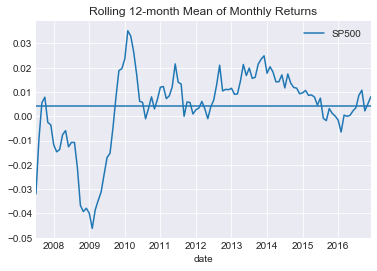

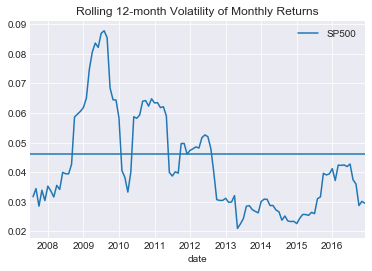

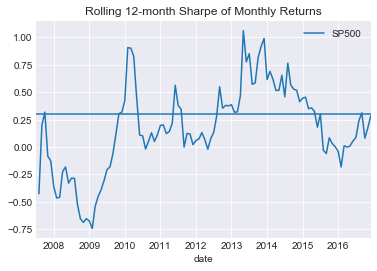

In [13]:
# Plotting the 12-month rolling annualized mean
rolling_mean = sp500_monthly_returns.rolling(window,min_periods=1).mean()
rolling_mean.plot(title='Rolling 12-month Mean of Monthly Returns')
plt.axhline(y=sp500_monthly_returns.values.mean())
plt.show()

#### SOMETHING WRONG WITH THIS: use monthly volatility, not monthly returns (?)
# Plotting the 12-month rolling annualized standard deviation
rolling_std = sp500_monthly_returns.rolling(window,min_periods=1).std()
rolling_std.plot(title='Rolling 12-month Volatility of Monthly Returns')
plt.axhline(y=sp500_monthly_returns.values.std())
plt.show()

# defining a Sharpe Ratio function
def Sharpe_ratio(excess):
    return excess.mean() / excess.std()

# Plotting the 12-month rolling Sharpe ratio
rolling_sharpe = sp500_monthly_returns.rolling(window,min_periods=1).apply(Sharpe_ratio)
rolling_sharpe.plot(title='Rolling 12-month Sharpe of Monthly Returns')
plt.axhline(y=ann_sharpe)
plt.show()

In [14]:
print(sp500_monthly_returns.describe())
sp500_monthly_returns.shape

            SP500
count  114.000000
mean     0.004341
std      0.046261
min     -0.169425
25%     -0.018076
50%      0.009512
75%      0.033393
max      0.107723


(114, 1)

In [15]:
print(sp500_monthly_returns.head(6))
sum(sp500_monthly_returns.values)


               SP500
date                
2007-07-31 -0.031982
2007-08-31  0.012864
2007-09-28  0.035794
2007-10-31  0.014822
2007-11-30 -0.044043
2007-12-31 -0.008628


array([ 0.49491322])